In [1]:
# iris_classification.py

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Print statement to verify that libraries are imported successfully
print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Load the Iris dataset from the UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, names=columns)

# Print statement to verify that data is loaded successfully
print("Data loaded successfully.")


Data loaded successfully.


In [3]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(iris.head())


First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(iris.describe())


Basic statistics of the dataset:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [5]:
# Display the count of each species in the dataset
print("\nCount of each species in the dataset:")
print(iris['species'].value_counts())


Count of each species in the dataset:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [6]:
# Encode the species column to numeric values
iris['species'] = iris['species'].astype('category').cat.codes

In [7]:
# Split the data into features (X) and target variable (y)
X = iris.drop('species', axis=1)
y = iris['species']

In [8]:
# Split the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print statement to verify that data is preprocessed successfully
print("Data preprocessed successfully.")

Data preprocessed successfully.


In [10]:
# Initialize and train the K-Nearest Neighbors classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Print statement to verify that model is trained successfully
print("Model trained successfully.")

Model trained successfully.


In [11]:
# Predict the test set results
y_pred = knn.predict(X_test)

In [12]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")


Accuracy: 1.0


In [13]:
# Print the classification report for detailed performance metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix to see the performance of the classifier
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


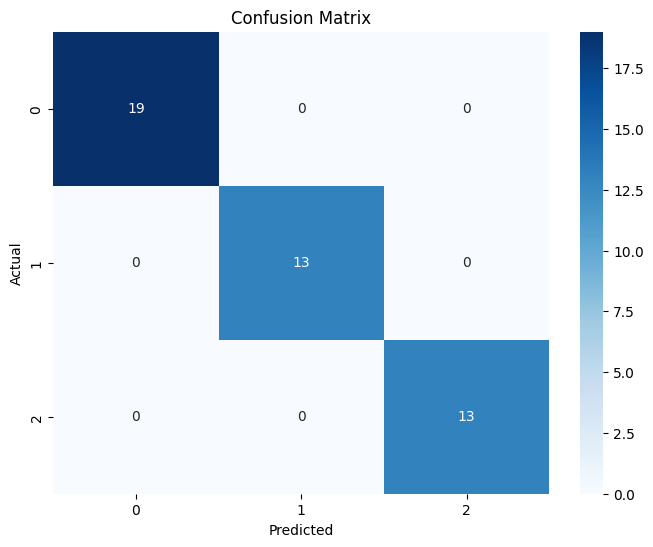

Results visualized.


In [14]:
# Visualize the confusion matrix using a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris['species'].unique(), yticklabels=iris['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print statement to verify that results are visualized
print("Results visualized.")